In [4]:
import pygplates
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd

import pt_validation as ptv

%matplotlib inline
%load_ext autoreload
%autoreload 2

reconstruction_basedir = '../../paleogeography/Paleogeography_Matthews2016_410-2Ma_Shapefiles/'
rotation_model = pygplates.RotationModel('%s/Global_EarthByte_230-0Ma_GK07_AREPS.rot' % reconstruction_basedir)

#static_polygons = pygplates.FeatureCollection('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/ContinentalPolygons/Matthews_etal_GPC_2016_ContinentalPolygons.gpmlz')
static_polygons = pygplates.FeatureCollection('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/StaticPolygons/Muller_etal_AREPS_2016_StaticPolygons.gpmlz')


    

In [5]:
pbdb = pd.read_csv('/Users/Simon/Data/pbdb/pbdb_occs.csv',delimiter=',',skiprows=14)

print 'Total records read = %s' % pbdb.size

pbdb = pbdb.dropna(subset=['environment','lat','lng'])
print 'Total records with valid environment = %s' % pbdb.size

print pbdb.columns

print pbdb.environment.unique()


/Users/Simon/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (12,19,20,21,22,29,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,47,48,49,50,51,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Total records read = 97112015
Total records with valid environment = 91071981
Index([u'occurrence_no', u'record_type', u'reid_no', u'superceded',
       u'collection_no', u'taxon_name', u'taxon_rank', u'taxon_no',
       u'matched_name', u'matched_rank', u'matched_no', u'early_interval',
       u'late_interval', u'early_age', u'late_age', u'reference_no', u'lng',
       u'lat', u'cc', u'state', u'county', u'geogscale', u'protected',
       u'early_age.1', u'late_age.1', u'cx_int_no', u'early_int_no',
       u'late_int_no', u'formation', u'stratgroup', u'member', u'stratscale',
       u'zone', u'localsection', u'localbed', u'localorder',
       u'regionalsection', u'regionalbed', u'regionalorder', u'stratcomments',
       u'lithdescript', u'lithology1', u'lithadj1', u'lithification1',
       u'minor_lithology1', u'fossilsfrom1', u'lithology2', u'lithadj2',
       u'lithification2', u'minor_lithology2', u'fossilsfrom2', u'environment',
       u'tectonic_setting', u'geology_comments', u'c

Time 5 Ma | 2446136 valid records | 205898 records with selected environment
Time 10 Ma | 3076227 valid records | 242627 records with selected environment
Time 15 Ma | 3245088 valid records | 190113 records with selected environment
Time 20 Ma | 3274502 valid records | 116270 records with selected environment
Time 25 Ma | 1755215 valid records | 145376 records with selected environment
Time 30 Ma | 1856162 valid records | 94633 records with selected environment
Time 35 Ma | 2751210 valid records | 31108 records with selected environment
Time 40 Ma | 2283435 valid records | 117579 records with selected environment
Time 45 Ma | 2133824 valid records | 129899 records with selected environment
Time 50 Ma | 2105796 valid records | 139986 records with selected environment
Time 55 Ma | 2713942 valid records | 325325 records with selected environment
Time 60 Ma | 1317008 valid records | 123585 records with selected environment
Time 65 Ma | 1903363 valid records | 116886 records with selected e

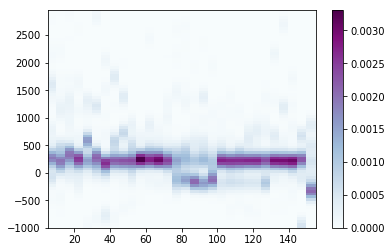

In [14]:
#
# For each timeslice in XX Myr increments,
# - extract fossils that would be considered 'valid' at that time
# - find whether the fossil environment matches some selected type, 'eg find me all the ones that are "delta"'
# - extract the (paleo)topography from grid at this time
# - Some option for how to display:
#   - weighted histogram has advantage that we can weight samples with a tight-time constraint more highly than
#   - samples with a large time-range
#   - kernel density estimation (or similar) more visually appealing, especially when samples are sparse 

# TODO
# If the XX Ma grid is considered as a timeslice, then should really consider
# all fossils between XX+delta_t and XX-delta_t Ma?
# Use collections or occurances?

hlist = []
time_list = np.arange(5,160,5)

environment_search_string = 'fluv'

for comparison_time in time_list:
    
    grdfile = '../../paleotopography/paleotopo_grids_netcdf4/paleotopobathy_smooth_%0.2fMa.nc' % comparison_time
    
    # Add time range specifier
    #pbdb_subset = pbdb[(pbdb.early_age<(comparison_time+10.)) & (pbdb.late_age>(comparison_time-10.))]
    pbdb_subset = pbdb[(pbdb.early_age>comparison_time) & (pbdb.late_age<comparison_time)
                      & (pbdb.lat>=-90.) & (pbdb.lat<=90.) & (pbdb.lng>=-180.) & (pbdb.lng<=180)]
    pbdb_subset2 = pbdb_subset[pbdb_subset.environment.str.contains(environment_search_string)]
    print 'Time %d Ma | %s valid records | %s records with selected environment' % (comparison_time,
                                                                                    pbdb_subset.size,
                                                                                    pbdb_subset2.size)                                                                             

    bc,h = ptv.indicator_z_distribution(pbdb_subset2,
                                        static_polygons, rotation_model, grdfile,
                                        comparison_time)

    hlist.append(h)


plt.pcolormesh(time_list,bc,np.array(hlist).T,cmap=plt.cm.BuPu) #,vmin=0,vmax=0.4)
plt.colorbar()

Time 5 Ma | 2446136 valid records | 205898 records with environment matching fluv


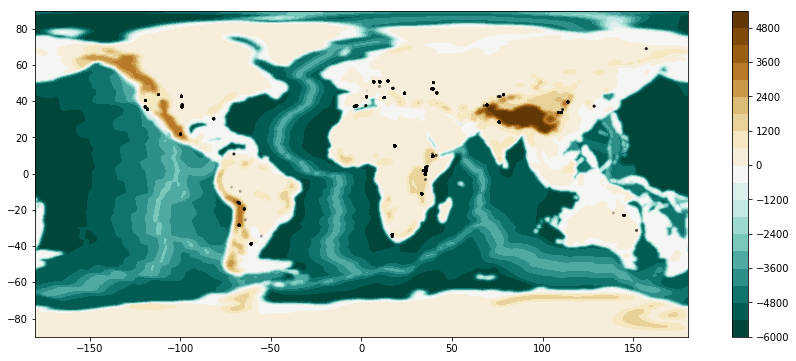

Time 10 Ma | 3076227 valid records | 242627 records with environment matching fluv


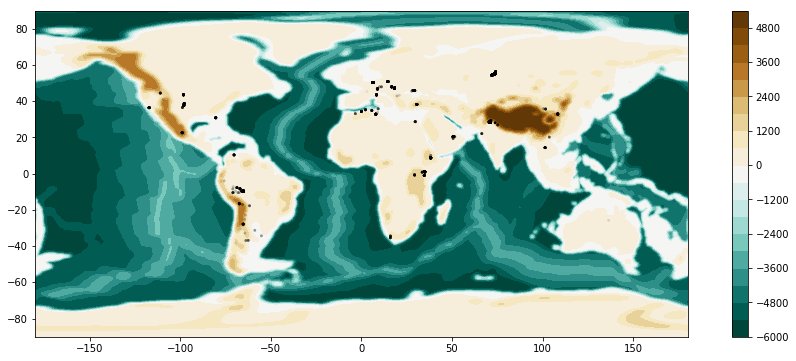

Time 15 Ma | 3245088 valid records | 190113 records with environment matching fluv


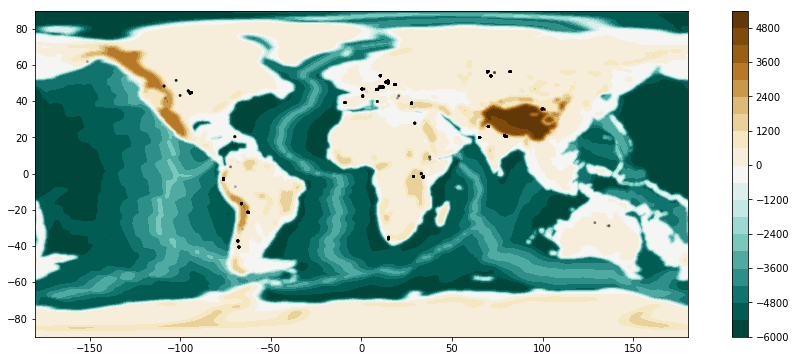

Time 20 Ma | 3274502 valid records | 116270 records with environment matching fluv


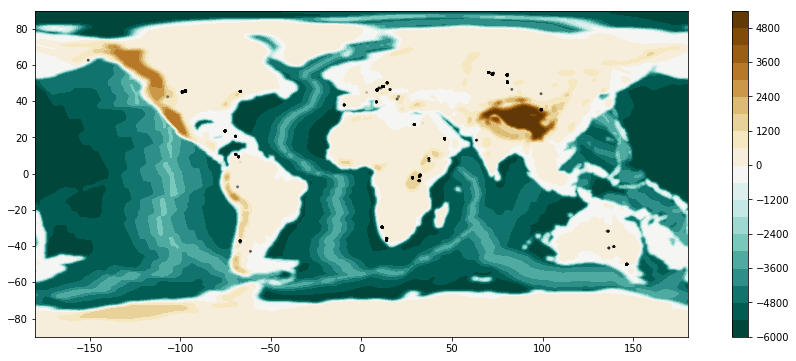

Time 25 Ma | 1755215 valid records | 145376 records with environment matching fluv


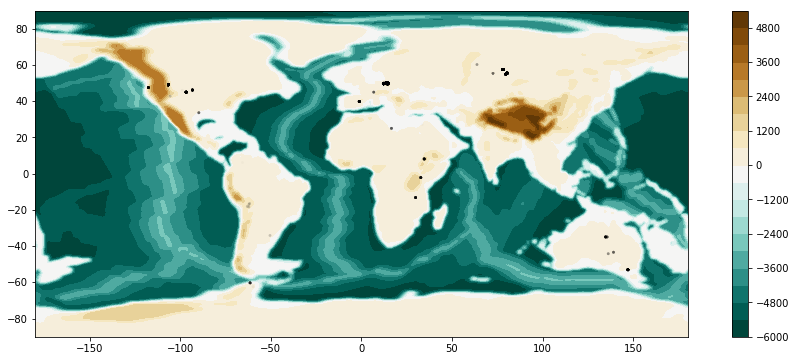

Time 30 Ma | 1856162 valid records | 94633 records with environment matching fluv


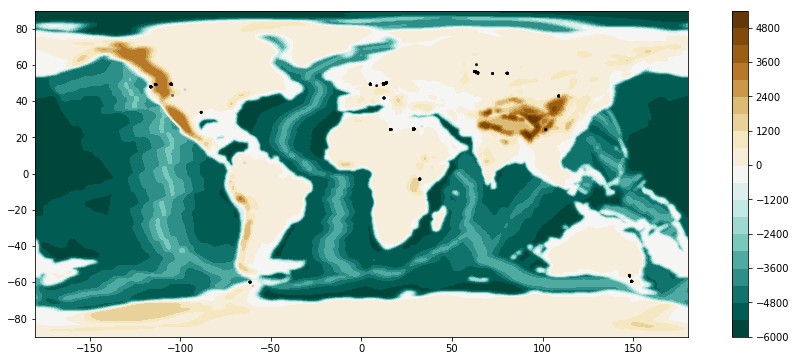

Time 35 Ma | 2751210 valid records | 31108 records with environment matching fluv


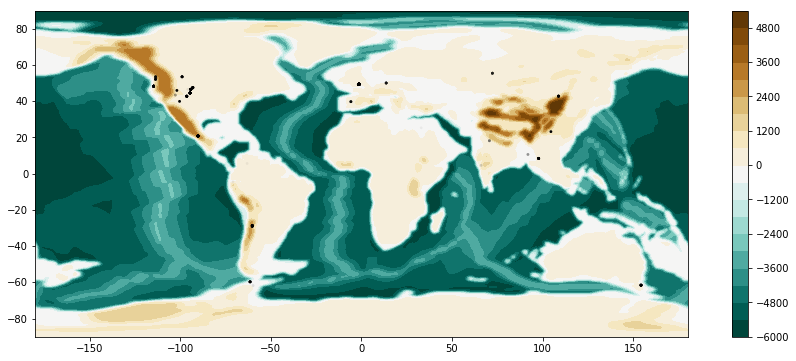

Time 40 Ma | 2283435 valid records | 117579 records with environment matching fluv


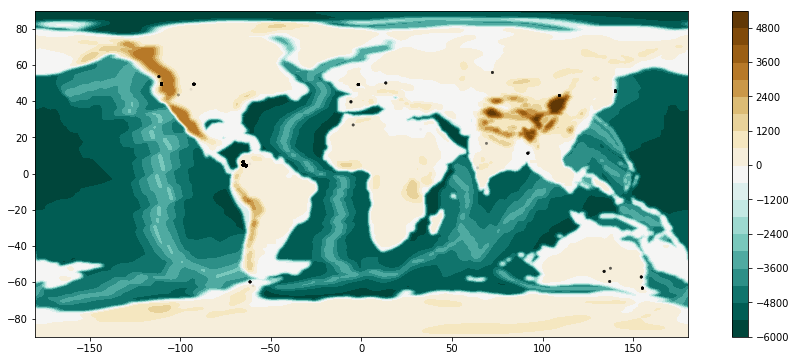

Time 45 Ma | 2133824 valid records | 129899 records with environment matching fluv


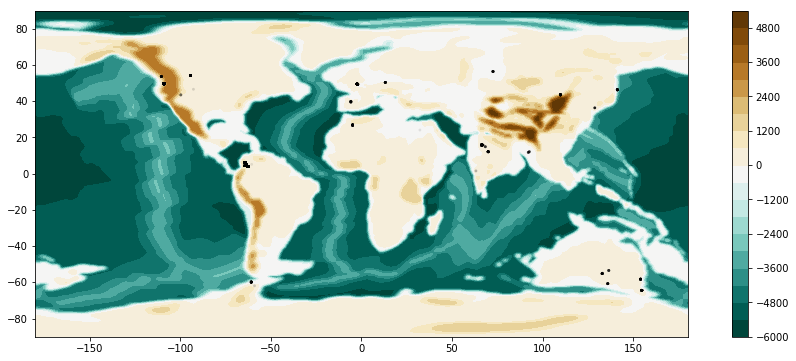

Time 50 Ma | 2105796 valid records | 139986 records with environment matching fluv


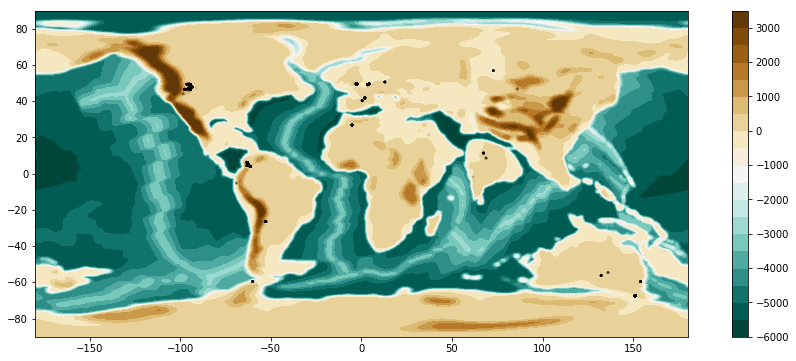

Time 55 Ma | 2713942 valid records | 325325 records with environment matching fluv


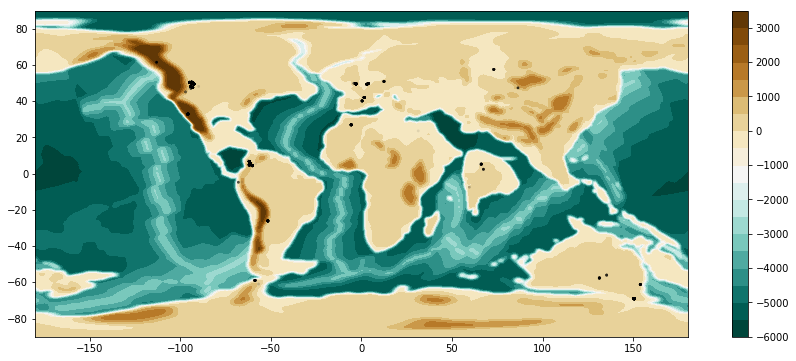

Time 60 Ma | 1317008 valid records | 123585 records with environment matching fluv


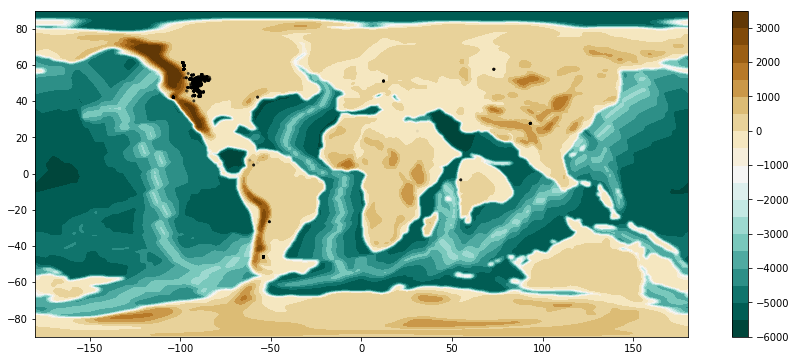

Time 65 Ma | 1903363 valid records | 116886 records with environment matching fluv


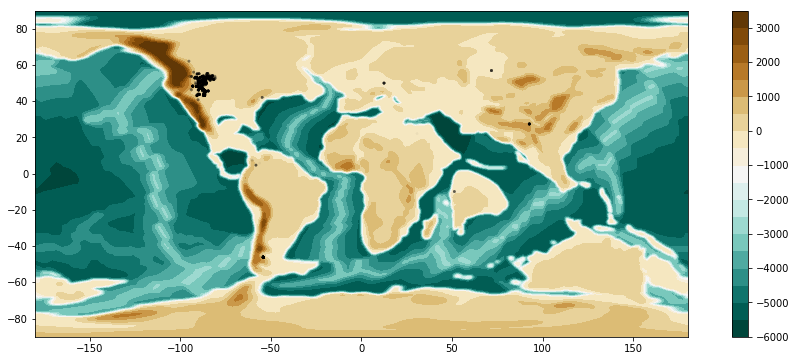

Time 70 Ma | 4139597 valid records | 91322 records with environment matching fluv


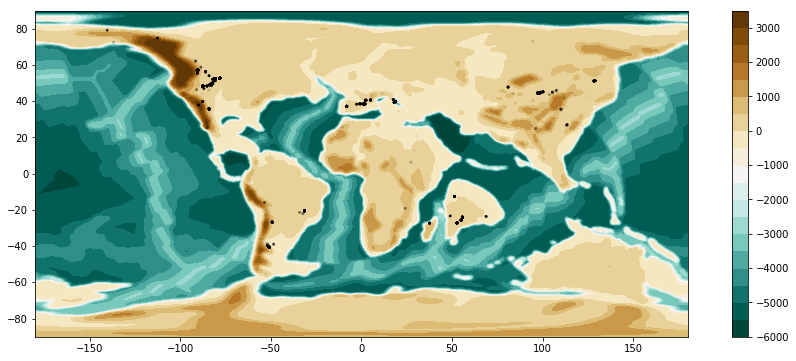

Time 75 Ma | 2701160 valid records | 65296 records with environment matching fluv


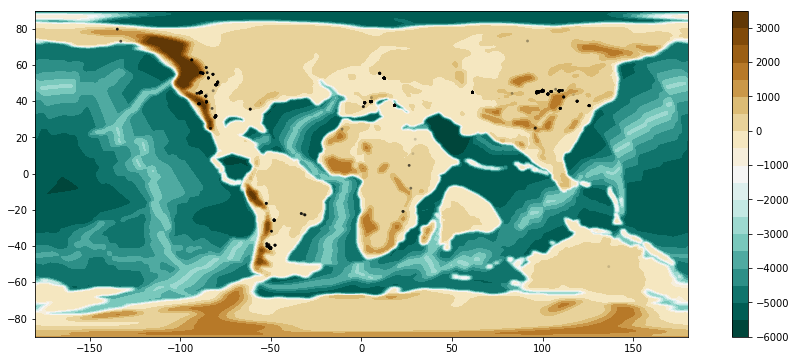

Time 80 Ma | 2701160 valid records | 65296 records with environment matching fluv


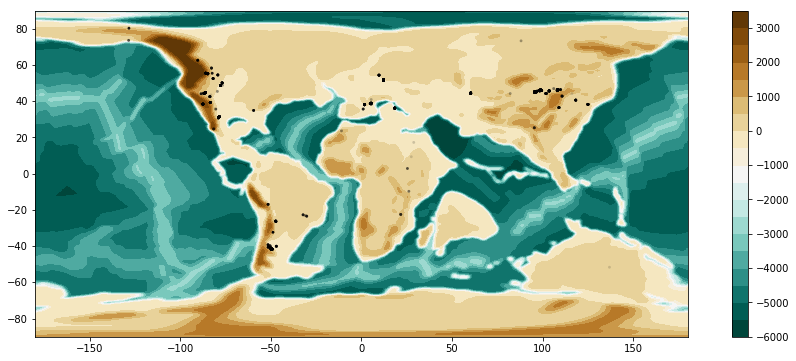

Time 85 Ma | 1368752 valid records | 40733 records with environment matching fluv


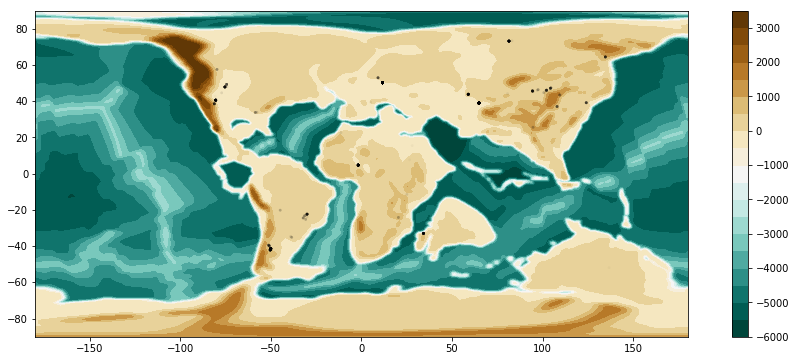

Time 90 Ma | 1346653 valid records | 35266 records with environment matching fluv


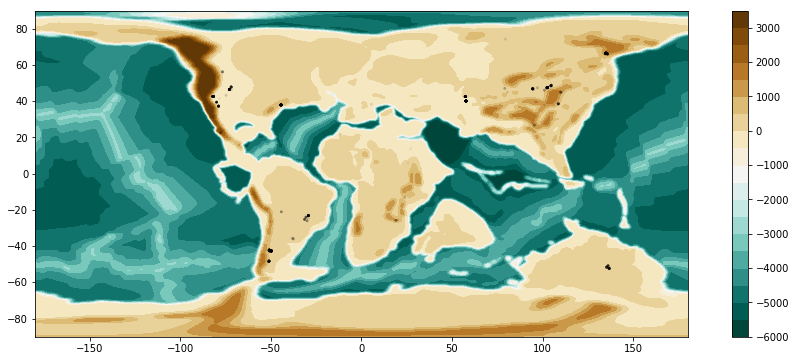

Time 95 Ma | 2263569 valid records | 89705 records with environment matching fluv


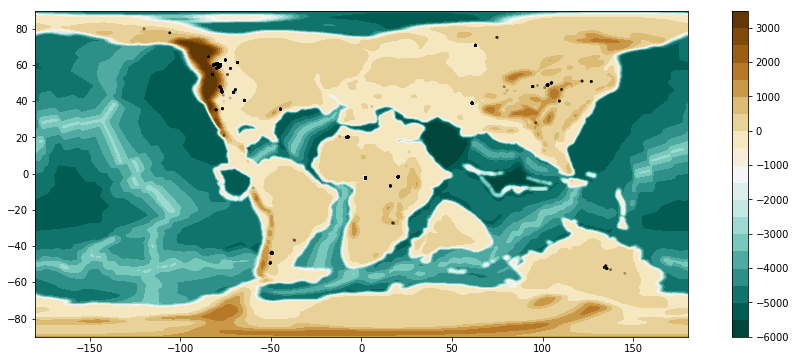

Time 100 Ma | 1856008 valid records | 62139 records with environment matching fluv


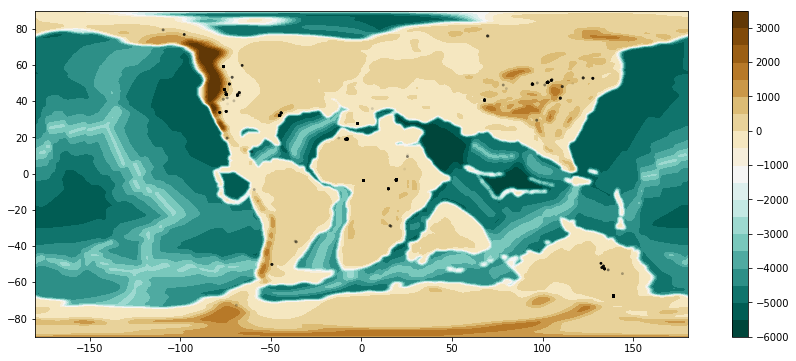

Time 105 Ma | 1842071 valid records | 95711 records with environment matching fluv


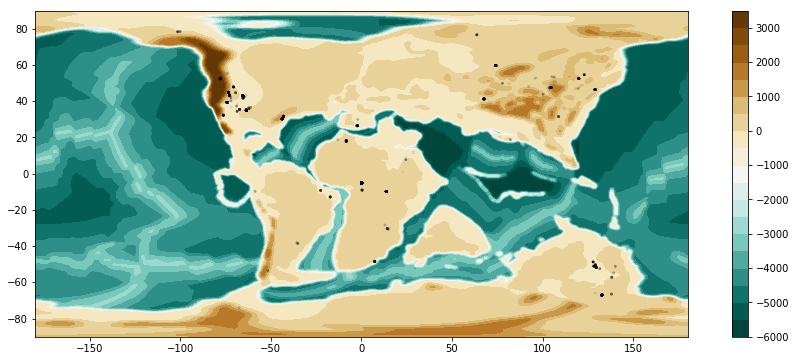

Time 110 Ma | 1629397 valid records | 91630 records with environment matching fluv


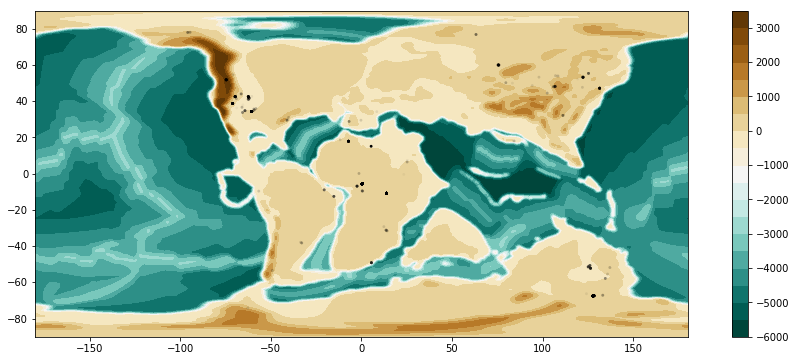

Time 115 Ma | 1528450 valid records | 77616 records with environment matching fluv


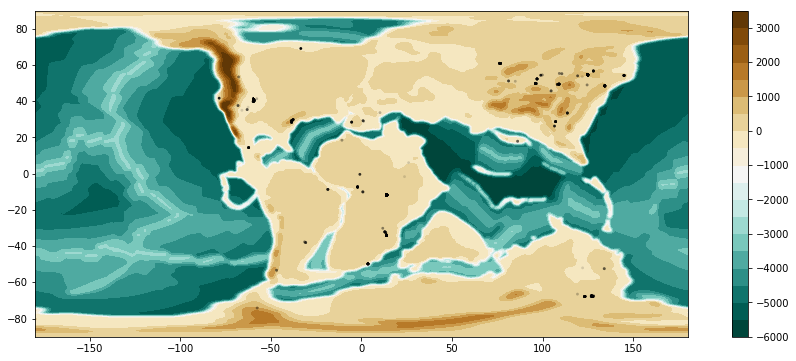

Time 120 Ma | 1528450 valid records | 77616 records with environment matching fluv


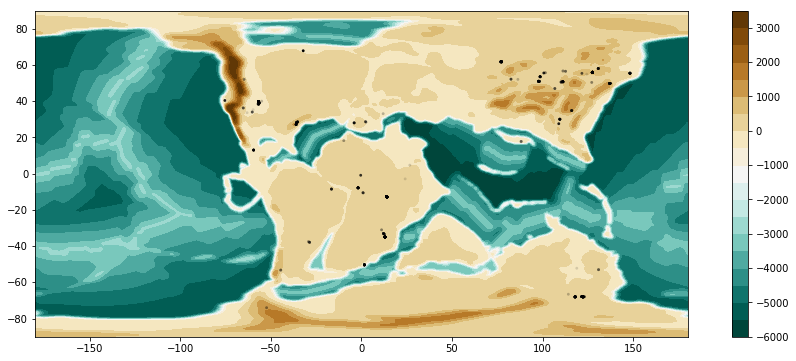

Time 125 Ma | 923923 valid records | 39347 records with environment matching fluv


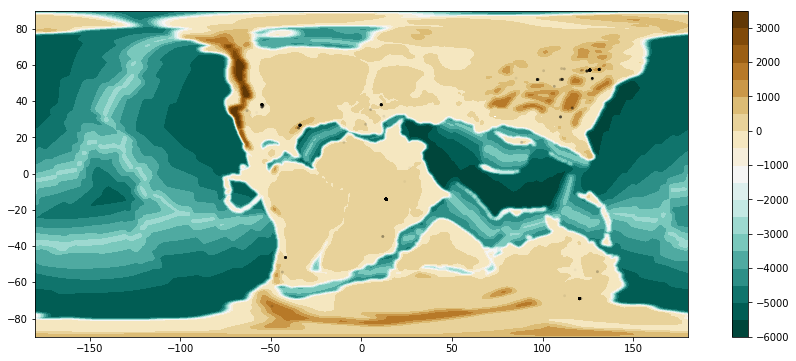

Time 130 Ma | 884191 valid records | 41426 records with environment matching fluv


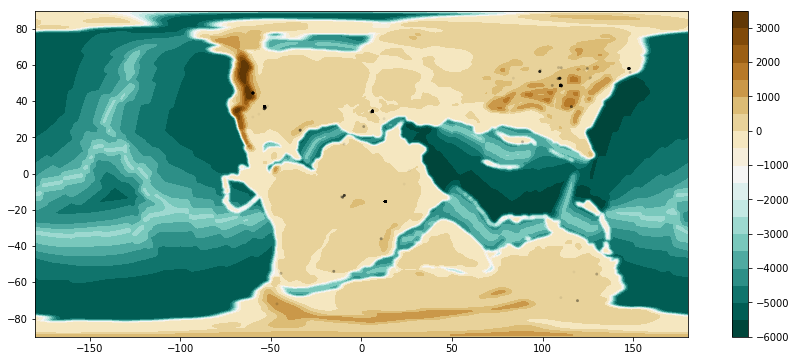

Time 135 Ma | 940709 valid records | 42119 records with environment matching fluv


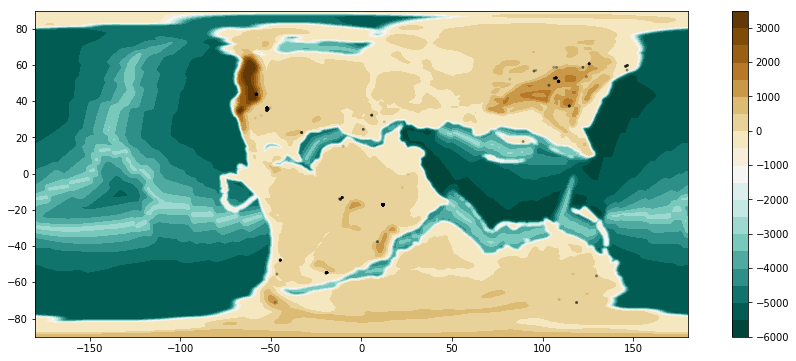

Time 140 Ma | 1012011 valid records | 45815 records with environment matching fluv


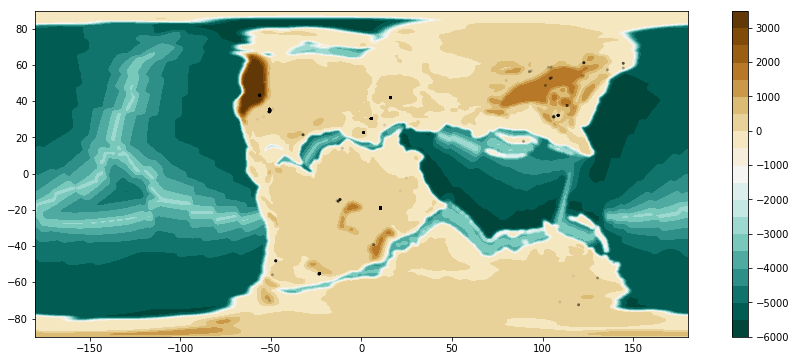

Time 145 Ma | 244937 valid records | 2695 records with environment matching fluv


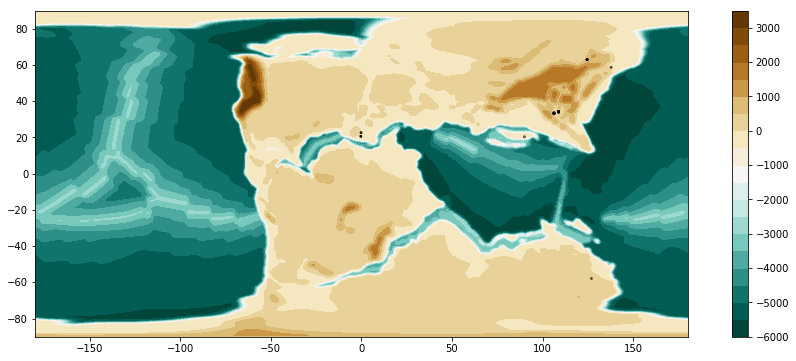

Time 150 Ma | 1506120 valid records | 20097 records with environment matching fluv


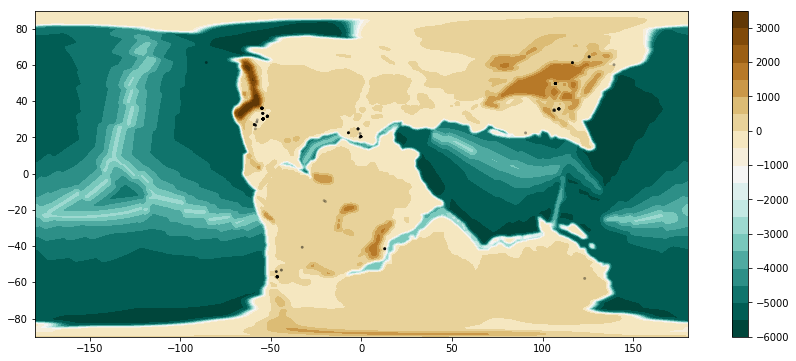

Time 155 Ma | 1250634 valid records | 17864 records with environment matching fluv


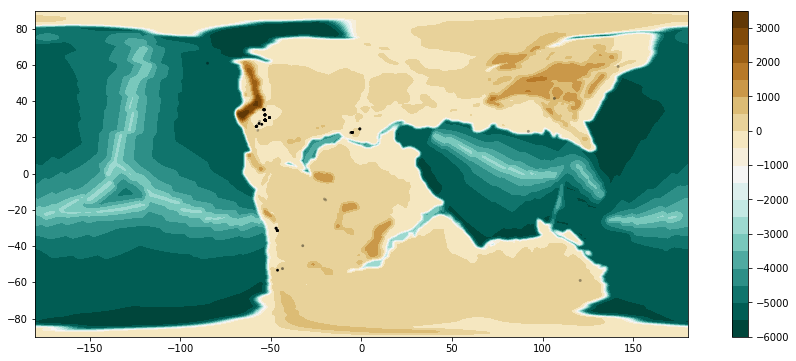

In [33]:
for comparison_time in time_list:
    
    grdfile = '../../paleotopography/paleotopo_grids_netcdf4/paleotopobathy_smooth_%0.2fMa.nc' % comparison_time
    
    # Add time range specifier
    #pbdb_subset = pbdb[(pbdb.early_age<(comparison_time+10.)) & (pbdb.late_age>(comparison_time-10.))]
    pbdb_subset = pbdb[(pbdb.early_age>comparison_time) & (pbdb.late_age<comparison_time)
                      & (pbdb.lat>=-90.) & (pbdb.lat<=90.) & (pbdb.lng>=-180.) & (pbdb.lng<=180)]
    pbdb_subset2 = pbdb_subset[pbdb_subset.environment.str.contains(environment_search_string)]
    print 'Time %d Ma | %s valid records | %s records with environment matching %s' % \
    (comparison_time, pbdb_subset.size, pbdb_subset2.size, environment_search_string)                                                                             

    ptv.plot_points_on_paleotopography(pbdb_subset2, static_polygons, rotation_model, 
                                       grdfile, comparison_time, weighting='alpha')
    
    

In [9]:
zdf = pd.read_hdf('/Users/Simon/GIT/pygplates-paleo/geology/Puetz_zircons.h5')

print 'Total records read = %s' % zdf.size

print 'Total records with valid environment = %s' % zdf.size

print zdf.columns


Total records read = 28489756
Total records with valid environment = 28489756
Index([                                                                                                  u'Data set No.',
                                                                                                                 u'Year',
                                                                             u'Authors, year - Journal Vol(Issue):pages',
                                                                                                            u'Table No.',
                                                                                                            u'Continent',
                                                                                                              u'Country',
                                                                                                             u'Locality',
                                                                    

Time 10 Ma | 16048 valid records
Time 12 Ma | 17816 valid records
Time 14 Ma | 21896 valid records
Time 16 Ma | 25296 valid records
Time 18 Ma | 30396 valid records
Time 20 Ma | 32436 valid records
Time 22 Ma | 31552 valid records
Time 24 Ma | 27540 valid records
Time 26 Ma | 20400 valid records
Time 28 Ma | 12512 valid records
Time 30 Ma | 13872 valid records
Time 32 Ma | 18564 valid records
Time 34 Ma | 19108 valid records
Time 36 Ma | 18700 valid records
Time 38 Ma | 13668 valid records
Time 40 Ma | 8772 valid records
Time 42 Ma | 7820 valid records
Time 44 Ma | 9112 valid records
Time 46 Ma | 6324 valid records
Time 48 Ma | 5508 valid records
Time 50 Ma | 7820 valid records
Time 52 Ma | 5644 valid records
Time 54 Ma | 5644 valid records
Time 56 Ma | 6528 valid records
Time 58 Ma | 7208 valid records
Time 60 Ma | 8908 valid records
Time 62 Ma | 7752 valid records
Time 64 Ma | 4488 valid records
Time 66 Ma | 4012 valid records
Time 68 Ma | 3944 valid records
Time 70 Ma | 5780 valid r

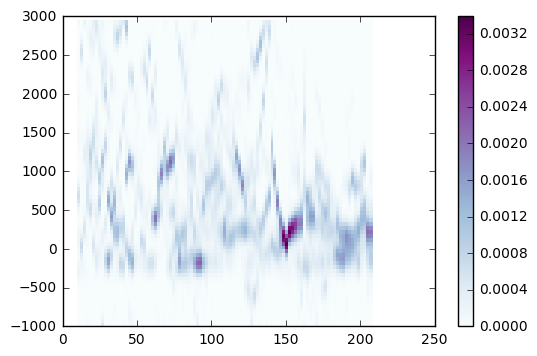

In [11]:
hlist = []

for comparison_time in time_list:
    
    # Add time range specifier
    #pbdb_subset = pbdb[(pbdb.early_age<(comparison_time+10.)) & (pbdb.late_age>(comparison_time-10.))]
    zdf_subset = zdf[(zdf['Model-1: Age with smallest error']>comparison_time-2.) 
                    & (zdf['Model-1: Age with smallest error']<comparison_time+2.)
                    & (zdf['Primary\nRock Type'].str.contains('ign'))]


    
    print 'Time %d Ma | %s valid records' % (comparison_time,zdf_subset.size)
    
    if zdf_subset.size>0:
        bc,h = ptv.indicator_z_distribution(zdf_subset,
                                            static_polygons,rotation_model,
                                            comparison_time,
                                            longitude_field_name='Longitude',
                                            latitude_field_name='Latitude')

        hlist.append(h)


plt.pcolormesh(time_list,bc,np.array(hlist).T,cmap=plt.cm.BuPu) #,vmin=0,vmax=0.4)
plt.colorbar()


Time 10 Ma | 68 valid records
Time 12 Ma | 340 valid records
Time 14 Ma | 1020 valid records
Time 16 Ma | 3332 valid records
Time 18 Ma | 6732 valid records
Time 20 Ma | 4624 valid records
Time 22 Ma | 816 valid records
Time 24 Ma | 952 valid records
Time 26 Ma | 1972 valid records
Time 28 Ma | 3128 valid records
Time 30 Ma | 2380 valid records
Time 32 Ma | 1224 valid records
Time 34 Ma | 2244 valid records
Time 36 Ma | 1836 valid records
Time 38 Ma | 1020 valid records
Time 40 Ma | 1496 valid records
Time 42 Ma | 1360 valid records
Time 44 Ma | 952 valid records
Time 46 Ma | 680 valid records
Time 48 Ma | 680 valid records
Time 50 Ma | 748 valid records
Time 52 Ma | 1020 valid records
Time 54 Ma | 816 valid records
Time 56 Ma | 748 valid records
Time 58 Ma | 748 valid records
Time 60 Ma | 680 valid records
Time 62 Ma | 884 valid records
Time 64 Ma | 1088 valid records
Time 66 Ma | 952 valid records
Time 68 Ma | 408 valid records
Time 70 Ma | 476 valid records
Time 72 Ma | 544 valid re

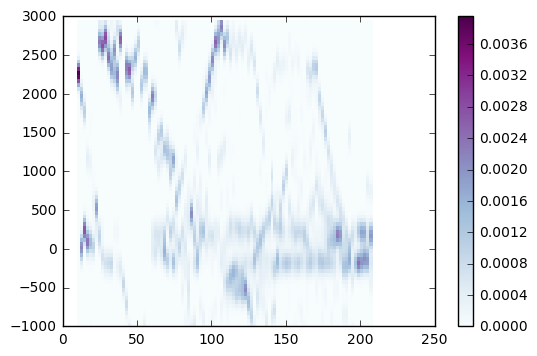

In [12]:
hlist = []

for comparison_time in time_list:
    
    # Add time range specifier
    #pbdb_subset = pbdb[(pbdb.early_age<(comparison_time+10.)) & (pbdb.late_age>(comparison_time-10.))]
    zdf_subset = zdf[(zdf['Model-1: Age with smallest error']>comparison_time-2.) 
                    & (zdf['Model-1: Age with smallest error']<comparison_time+2.)
                    & (zdf['Primary\nRock Type'].str.contains('meta'))]


    
    print 'Time %d Ma | %s valid records' % (comparison_time,zdf_subset.size)
    
    if zdf_subset.size>0:
        bc,h = ptv.indicator_z_distribution(zdf_subset,
                                            static_polygons,rotation_model,
                                            comparison_time,
                                            longitude_field_name='Longitude',
                                            latitude_field_name='Latitude')

        hlist.append(h)


plt.pcolormesh(time_list,bc,np.array(hlist).T,cmap=plt.cm.BuPu) #,vmin=0,vmax=0.4)
plt.colorbar()

1350387
Time 5 Ma | 190551 valid records
Time 10 Ma | 257868 valid records
Time 15 Ma | 259749 valid records
Time 20 Ma | 255132 valid records
Time 25 Ma | 150366 valid records
Time 30 Ma | 146490 valid records
Time 35 Ma | 145236 valid records
Time 40 Ma | 141531 valid records
Time 45 Ma | 135318 valid records
Time 50 Ma | 135717 valid records
Time 55 Ma | 119244 valid records
Time 60 Ma | 113259 valid records
Time 65 Ma | 51471 valid records
Time 70 Ma | 119814 valid records
Time 75 Ma | 120042 valid records
Time 80 Ma | 119301 valid records
Time 85 Ma | 120897 valid records
Time 90 Ma | 122493 valid records
Time 95 Ma | 122835 valid records
Time 100 Ma | 121866 valid records
Time 105 Ma | 122721 valid records
Time 110 Ma | 123234 valid records
Time 115 Ma | 123690 valid records
Time 120 Ma | 121239 valid records
Time 125 Ma | 120840 valid records
Time 130 Ma | 117534 valid records
Time 135 Ma | 117762 valid records
Time 140 Ma | 118332 valid records
Time 145 Ma | 85158 valid records

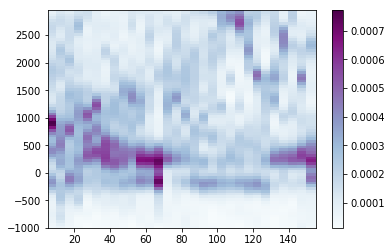

In [41]:
andesites = pd.read_excel('/Users/Simon/Data/TimeEncodedData/Andesites/earthchem_download_36928.xlsx',
                          skiprows=5)

#andesites.columns
print andesites.size

hlist = []

for comparison_time in time_list:
    
    grdfile = '../../paleotopography/paleotopo_grids_netcdf4/paleotopobathy_smooth_%0.2fMa.nc' % comparison_time

    # Add time range specifier
    #pbdb_subset = pbdb[(pbdb.early_age<(comparison_time+10.)) & (pbdb.late_age>(comparison_time-10.))]
    andesites_subset = andesites[(andesites['MAX AGE']>comparison_time) 
                                 & (andesites['MIN AGE']<comparison_time)]
    
    print 'Time %d Ma | %s valid records' % (comparison_time,andesites_subset.size)
    
    if andesites_subset.size>0:
        bc,h = ptv.indicator_z_distribution(andesites_subset,
                                            static_polygons,
                                            rotation_model, grdfile,
                                            comparison_time,
                                            longitude_field_name='LONGITUDE',
                                            latitude_field_name='LATITUDE')

        hlist.append(h)


plt.pcolormesh(time_list,bc,np.array(hlist).T,cmap=plt.cm.BuPu) #,vmin=0,vmax=0.4)
plt.colorbar()
